<a href="https://colab.research.google.com/github/nomanarshad1212/Neural_Style_Transfer/blob/master/Final_Year_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


# **Required Libraries**
### Installing the required libraries:
Here I am installing Scipy Library

In [2]:
!pip install -q 'scipy<=1.2.1'  # scipy.misc.imread is deprecated in later versions

     |████████████████████████████████| 24.8 MB 1.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lucid 0.3.10 requires umap-learn, which is not installed.
lucid 0.3.10 requires numpy<=1.19, but you have numpy 1.21.6 which is incompatible.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.15.2 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
!git clone https://github.com/nomanarshad1212/Neural_Style_Transfer.git

Cloning into 'Neural_Style_Transfer'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 22 (delta 8), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (22/22), done.


In [4]:
dir_path = "/content/Neural_Style_Transfer"

In [5]:
NETWORK = 'INetwork' + '.py'

In [6]:
# List all the arguments that can be supplied to Network.py
!python {dir_path}/{NETWORK} -h

Using TensorFlow backend.
usage: INetwork.py [-h] [--style_masks STYLE_MASKS [STYLE_MASKS ...]]
                   [--content_mask CONTENT_MASK] [--color_mask COLOR_MASK]
                   [--image_size IMG_SIZE] [--content_weight CONTENT_WEIGHT]
                   [--style_weight STYLE_WEIGHT [STYLE_WEIGHT ...]]
                   [--style_scale STYLE_SCALE]
                   [--total_variation_weight TV_WEIGHT] [--num_iter NUM_ITER]
                   [--model MODEL] [--content_loss_type CONTENT_LOSS_TYPE]
                   [--rescale_image RESCALE_IMAGE]
                   [--rescale_method RESCALE_METHOD]
                   [--maintain_aspect_ratio MAINTAIN_ASPECT_RATIO]
                   [--content_layer CONTENT_LAYER] [--init_image INIT_IMAGE]
                   [--pool_type POOL] [--preserve_color COLOR]
                   [--min_improvement MIN_IMPROVEMENT]
                   base ref [ref ...] res_prefix

Neural style transfer with Keras.

positional arguments:
  base     

In [7]:
# Image size
IMAGE_SIZE = 500

# Loss Weights
CONTENT_WEIGHT = 0.025
STYLE_WEIGHT = 1.0
STYLE_SCALE = 1.0
TOTAL_VARIATION_WEIGHT = 8.5e-5
CONTENT_LOSS_TYPE = 0

# Training arguments
NUM_ITERATIONS = 10
MODEL = 'vgg19'
RESCALE_IMAGE = 'false'
MAINTAIN_ASPECT_RATIO = 'false'  # Set to false if OOM occurs

# Transfer Arguments
CONTENT_LAYER = 'conv' + '5_2'  # only change the number 5_2 to something in a similar format
INITIALIZATION_IMAGE = 'content'
POOLING_TYPE = 'max'

# Extra arguments
PRESERVE_COLOR = 'false'
MIN_IMPROVEMENT = 0.0

In [8]:
from google.colab import files

content_img = files.upload()

Saving sagano_bamboo_forest.jpg to sagano_bamboo_forest.jpg


In [9]:
import os

CONTENT_IMAGE_FN = list(content_img)[0]
CONTENT_IMAGE_FN_temp = CONTENT_IMAGE_FN.strip().replace(" ", "_")

if CONTENT_IMAGE_FN != CONTENT_IMAGE_FN_temp:
  os.rename(CONTENT_IMAGE_FN, CONTENT_IMAGE_FN_temp)
  CONTENT_IMAGE_FN = CONTENT_IMAGE_FN_temp
  
print("Content image filename :", CONTENT_IMAGE_FN)

Content image filename : sagano_bamboo_forest.jpg


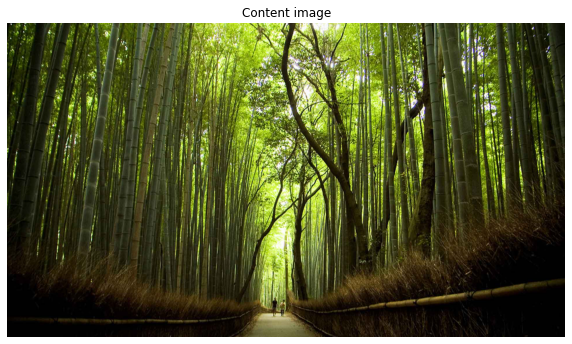

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
img = plt.imread(CONTENT_IMAGE_FN)
plt.axis('off')
plt.title('Content image')
plt.imshow(img)

In [11]:
style_img = files.upload()

Saving patterned_leaves.jpg to patterned_leaves.jpg


In [12]:
STYLE_IMAGE_FN = list(style_img)[0]
STYLE_IMAGE_FN_temp = STYLE_IMAGE_FN.strip().replace(" ", "_")

if STYLE_IMAGE_FN != STYLE_IMAGE_FN_temp:
  os.rename(STYLE_IMAGE_FN, STYLE_IMAGE_FN_temp)
  STYLE_IMAGE_FN = STYLE_IMAGE_FN_temp

print("Style image filename :", STYLE_IMAGE_FN)

Style image filename : patterned_leaves.jpg


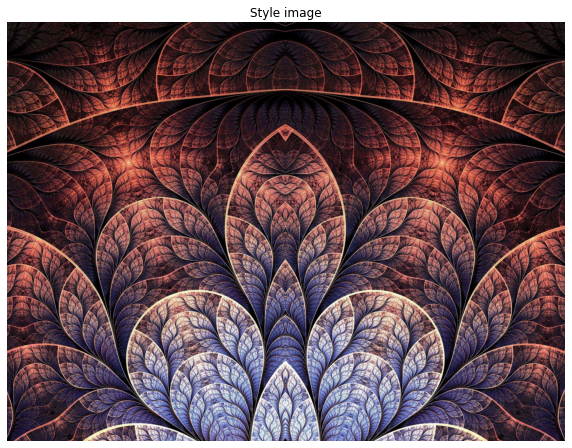

In [13]:
fig = plt.figure(figsize=(10, 10))
img = plt.imread(STYLE_IMAGE_FN)
plt.axis('off')
plt.title('Style image')
plt.imshow(img)

In [14]:
import os

RESULT_DIR = "generated/"
RESULT_PREFIX = RESULT_DIR + "gen"
FINAL_IMAGE_PATH = RESULT_PREFIX + "_at_iteration_%d.png" % (NUM_ITERATIONS)

if not os.path.exists(RESULT_DIR):
  os.makedirs(RESULT_DIR)

In [15]:
!python {dir_path}/{NETWORK} {CONTENT_IMAGE_FN} {STYLE_IMAGE_FN} {RESULT_PREFIX} \
  --image_size {IMAGE_SIZE} --content_weight {CONTENT_WEIGHT} --style_weight \
  {STYLE_WEIGHT} --style_scale {STYLE_SCALE} --total_variation_weight \
  {TOTAL_VARIATION_WEIGHT} --content_loss_type {CONTENT_LOSS_TYPE} --num_iter \
  {NUM_ITERATIONS} --model {MODEL} --rescale_image {RESCALE_IMAGE} \
  --maintain_aspect_ratio {MAINTAIN_ASPECT_RATIO} --content_layer {CONTENT_LAYER} \
  --init_image {INITIALIZATION_IMAGE} --pool_type {POOLING_TYPE} --preserve_color \
  {PRESERVE_COLOR} --min_improvement {MIN_IMPROVEMENT}

Using TensorFlow backend.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.

80142336/80134624 [==============================] - 1s 0us/step
2022-05-12 11:16:56.667565: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-05-12 11:16:56.721027: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-12 11:16:56.721793: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.562
pciBusID: 0000:00:04.0
2022-05-12 11:16:56.734377: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-05-12 11:16:56.912236: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynam

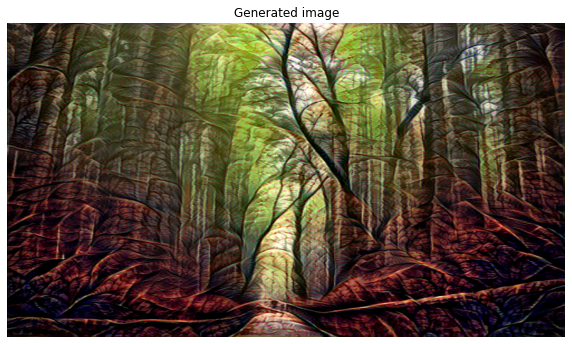

In [16]:
fig = plt.figure(figsize=(10, 10))
img = plt.imread(FINAL_IMAGE_PATH)
plt.axis('off')
plt.title('Generated image')
plt.imshow(img)

In [17]:
COLOR_TRANSFER = 'color_transfer.py'
COLOR_FINAL_IMAGE_PATH = FINAL_IMAGE_PATH[:-4] + '_%s_color.png'

# Optional - Use Histogram matching (0 for no, 1 for yes)
HISTOGRAM_MATCH = 0

if HISTOGRAM_MATCH == 0:
  COLOR_FINAL_IMAGE_PATH = COLOR_FINAL_IMAGE_PATH % ('original')
else:
  COLOR_FINAL_IMAGE_PATH = COLOR_FINAL_IMAGE_PATH % ('histogram')
  

!python {dir_path}/{COLOR_TRANSFER} {CONTENT_IMAGE_FN} {FINAL_IMAGE_PATH} --hist_match {HISTOGRAM_MATCH}

/content/Neural_Style_Transfer/color_transfer.py:116: DeprecationWarning:     `imread` is deprecated!
    `imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imread`` instead.
  generated_image = imread(args.generated_image, mode="RGB")
/content/Neural_Style_Transfer/color_transfer.py:119: DeprecationWarning:     `imread` is deprecated!
    `imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imread`` instead.
  content_image = imread(args.content_image, mode=mode)
/content/Neural_Style_Transfer/color_transfer.py:120: DeprecationWarning:     `imresize` is deprecated!
    `imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
    Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  content_image = imresize(content_image, (img_width, img_height), interp='bicubic')
/content/Neural_Style_Transfer/color_transfer.py:58: DeprecationWarning:     `toimage` is deprecated!
    `toimage` is deprec

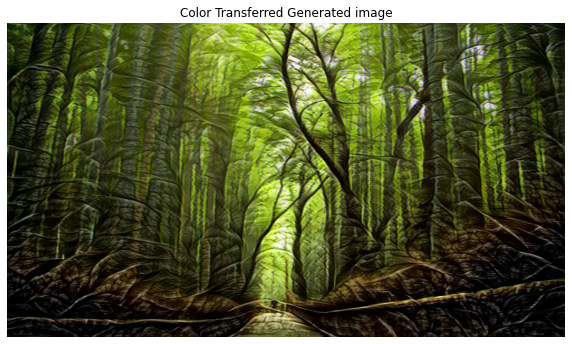

In [18]:
fig = plt.figure(figsize=(10, 10))
img = plt.imread(COLOR_FINAL_IMAGE_PATH)
plt.axis('off')
plt.title('Color Transferred Generated image')
plt.imshow(img)

In [19]:
# download the color transfered image
files.download(COLOR_FINAL_IMAGE_PATH)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
files.download(FINAL_IMAGE_PATH)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>